In [ ]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 99.2 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

In [ ]:
df = pd.read_csv("twitter_train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
hate_tweet = df[df.label == 1]
hate_tweet.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [ ]:
normal_tweet = df[df.label == 0]
normal_tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


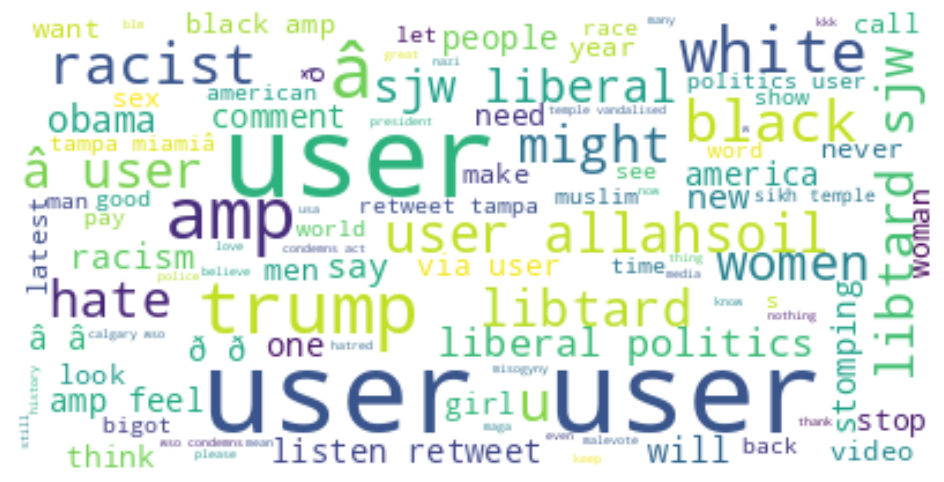

In [ ]:
# Hate Word clouds
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(review for review in hate_tweet.tweet)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#distributions
df_Stat=df[['label','tweet']].groupby('label').count().reset_index()
df_Stat.columns=['label','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

,label,count,percentage
0,0,29720,92.98542
1,1,2242,7.01458


In [ ]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

df['processed_tweets'] = df['tweet'].apply(process_tweet)
df.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df[df['label'] == 0]['processed_tweets'].count()
df_class_fraud = df[df['label'] == 1]
df_class_nonfraud = df[df['label'] == 0]
df_class_fraud_oversample = df_class_fraud.sample(cnt_non_fraud, replace=True)
df_oversampled = pd.concat([df_class_nonfraud, df_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df_oversampled['label'].value_counts())

Random over-sampling:
0    29720
1    29720
Name: label, dtype: int64


In [ ]:
shuffled_df = df_oversampled.sample(frac=1, random_state=42)

In [ ]:
portion = 0.5  # 50%
sampled_df = shuffled_df.iloc[:int(len(shuffled_df) * portion)]

In [ ]:
sampled_df

,id,label,tweet,processed_tweets
21960,21961,0,@user is this for real? #waspi 50sborn in abje...,is this for real waspi 50sborn in abject povey...
21181,21182,0,shit happens but life goes on. good blessðð...,shit happens but life goes on good bless days
5019,5020,1,bout to spend new year's eve playing the game...,bout to spend new year s eve playing the game lol
18718,18719,0,with so many delicious burger &amp; entree sel...,with so many delicious burger amp entree selec...
14896,14897,0,@user i wanna see it. #shohairclub,i wanna see it shohairclub
...,...,...,...,...
24201,24202,1,â¦ you #hispanic &amp; feel like the are sto...,you hispanic amp feel like the are stomping on...
1312,1313,0,@user repoer has to read lgbt from a card? ...,repoer has to read lgbt from a card bbcnews or...
23279,23280,1,this is sooooo or may be just funny,this is sooooo or may be just funny
9888,9889,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur


In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X = sampled_df['processed_tweets']
y = sampled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = None)

In [ ]:
print(y_train.shape, y_test.shape)

(23776,) (5944,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [ ]:
 x_train_counts= count_vect.fit_transform(X_train).toarray()
# x_train_tfidf = transformer.fit_transform(x_train_counts).toarray()

In [ ]:
print(x_train_counts.shape)
# print(x_train_tfidf.shape)

(23776, 22769)


In [ ]:
x_train_counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test_counts = count_vect.transform(X_test).toarray()
# x_test_tfidf = transformer.transform(x_test_counts).toarray()

In [ ]:
print(x_test_counts.shape)
# print(x_test_tfidf.shape)

(5944, 22769)


# Classical NN

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_counts.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = RMSprop(learning_rate=0.001)  # You can adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
# Train the model
epochs = 5
batch_size = 32
history = model.fit(
    x_train_counts, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_counts, y_test),
    verbose=1
)

Epoch 1/5
743/743 [==============================] - 20s 11ms/step - loss: 0.2713 - accuracy: 0.8953 - auc: 0.9581 - val_loss: 0.1521 - val_accuracy: 0.9452 - val_auc: 0.9850
Epoch 2/5
743/743 [==============================] - 6s 8ms/step - loss: 0.1137 - accuracy: 0.9615 - auc: 0.9907 - val_loss: 0.1146 - val_accuracy: 0.9618 - val_auc: 0.9898
Epoch 3/5
743/743 [==============================] - 5s 7ms/step - loss: 0.0737 - accuracy: 0.9776 - auc: 0.9951 - val_loss: 0.0976 - val_accuracy: 0.9731 - val_auc: 0.9920
Epoch 4/5
743/743 [==============================] - 6s 7ms/step - loss: 0.0525 - accuracy: 0.9855 - auc: 0.9968 - val_loss: 0.0903 - val_accuracy: 0.9749 - val_auc: 0.9928
Epoch 5/5
743/743 [==============================] - 5s 7ms/step - loss: 0.0406 - accuracy: 0.9890 - auc: 0.9976 - val_loss: 0.0901 - val_accuracy: 0.9753 - val_auc: 0.9936


In [ ]:
y_pred = model.predict(x_test_counts)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation results
print(f"Test Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


186/186 [==============================] - 1s 4ms/step
Test Set Metrics:
Accuracy: 0.9753
Precision: 0.9642
Recall: 0.9868
F1 Score: 0.9754
ROC AUC Score: 0.9943


# Quantum NN

In [ ]:
import torch

layer_1 = torch.nn.Linear(2, 2)
layer_2 = torch.nn.Linear(2, 2)
softmax = torch.nn.Softmax(dim=1)

layers = [layer_1, layer_2, softmax]
model = torch.nn.Sequential(*layers)

In [ ]:
X_train1=x_train_counts
X_test1=x_test_counts

y_train1=y_train.to_numpy()
y_test1=y_test.to_numpy()

y_1=torch.unsqueeze(torch.tensor(y_train1), 1)
y_hot_train = torch.scatter(torch.zeros((23800,2)), 1, y_1, 1)

y_2=torch.unsqueeze(torch.tensor(y_test1), 1)
y_hot_test = torch.scatter(torch.zeros((5950, 2)), 1, y_2, 1)

In [ ]:
import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [ ]:
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}

In [ ]:
qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

In [ ]:
clayer_1 = torch.nn.Linear(x_train_counts.shape[1], 2)
clayer_2 = torch.nn.Linear(2, 2)
softmax = torch.nn.Softmax(dim=1)
layers = [clayer_1, qlayer, clayer_2, softmax]
model = torch.nn.Sequential(*layers)

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=0.02)
loss = torch.nn.L1Loss()

In [ ]:
X_train1 = torch.tensor(X_train1, requires_grad=False).float()
y_hot_train = y_hot_train.float()
l=[]
batch_size = 5
batches = 200 // batch_size

data_loader = torch.utils.data.DataLoader(
    list(zip(X_train1, y_hot_train)), batch_size=5, shuffle=True, drop_last=True
)

epochs = 10

for epoch in range(epochs):

    running_loss = 0

    for xs, ys in data_loader:
        opt.zero_grad()

        loss_evaluated = loss(model(xs), ys)
        loss_evaluated.backward()

        opt.step()

        running_loss += loss_evaluated

    avg_loss = running_loss / batches
    l.append(avg_loss)
    print("Average loss over epoch {}: {:.4f}".format(epoch + 1, avg_loss))

Average loss over epoch 1: 44.6234
Average loss over epoch 2: 18.1959
Average loss over epoch 3: 11.3328
Average loss over epoch 4: 8.3503


In [ ]:
import numpy

hybrid_nn=[]
for i in l:
    i=i.detach().numpy()
    hybrid_nn.append(i)

In [ ]:
plt.plot(hybrid_nn, label='Hybrid NN')
plt.plot(val_err,  label='Classical NN')
plt.plot(objective_func_vals,  label='VQC NN')
plt.xlabel('Epochs')
plt.ylabel('Objective Function')
plt.legend(loc='upper right')

In [ ]:
X_test1 = torch.tensor(X_test1, requires_grad=False).float()


y_pred_QNN = model(X_test1)
predictions = torch.argmax(y_pred_QNN, axis=1).detach().numpy()

correct = [1 if p == p_true else 0 for p, p_true in zip(predictions, y_test1)]
accuracy = sum(correct) / len(correct)
print(f"Accuracy: {accuracy * 100}%")

In [ ]:
y_pred_QNN=predictions


In [ ]:
QNN_accuracy = accuracy_score(y_test, y_pred_QNN)
QNN_precision = precision_score(y_test, y_pred_QNN,average='weighted', labels=np.unique(y_pred_QNN))
QNN_recall = recall_score(y_test, y_pred_QNN,average='weighted', labels=np.unique(y_pred_QNN))
QNN_f1score = f1_score(y_test, y_pred_QNN, average='weighted', labels=np.unique(y_pred_QNN))

QNN_list=[QNN_accuracy,QNN_precision,QNN_recall,QNN_f1score]

print(QNN_list)

In [ ]:
plt.bar(r, QNN_list,
        width = 0.5,
        label='Hybrid QNN')
plt.xticks(r + width/4,['Accuracy','Precision','Recall','F1_score'])
plt.legend()

plt.show()

In [ ]:
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_QNN)
plt.plot(fpr4, tpr4,label="Hybrid QNN")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC-ROC curve")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_hqnn=confusion_matrix( y_test, y_pred_QNN )
sns.heatmap(cm_hqnn,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()